In [1]:
import pandas as pd
import os
import matplotlib
import seaborn as sns
import numpy as np

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from src.data.preprocessing import *
from src.data.load_data_yoochoose import *

In [4]:
os.listdir("../data/raw/yoochoose-csv/")

['dataset-README.txt',
 'yoochoose-buys.csv',
 'yoochoose-clicks.csv',
 'yoochoose-test.csv']

In [2]:
events = load_clicks()

C:\Users\koprl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [7]:
events.head()

,visitorid,timestamp,itemid,category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0


In [8]:
events.shape

(33003944, 4)

In [10]:
events.visitorid.nunique()

9249729

In [12]:
events.itemid.nunique()

52739

In [14]:
events.groupby(["visitorid"]).itemid.nunique().mean()

2.877443868896051

In data we have 9,25 milion unique sessions. During average session user has interaction with 2,87 items.
We have 52 thousand items. 

### users

In [15]:
# distribution of users by count of interactions
events.visitorid.value_counts().describe()

count    9.249729e+06
mean     3.568098e+00
std      3.787520e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.000000e+02
Name: visitorid, dtype: float64

At least 50% of users has only 1 interaction

In [19]:
# How many users interacted with 1,2,..,10 unique products?
events.groupby(["visitorid"]).itemid.nunique().value_counts().sort_index()[:10]

1     2493154
2     3273089
3     1447044
4      748610
5      423918
6      257964
7      166195
8      110891
9       76887
10      54886
Name: itemid, dtype: int64

In [36]:
# How many users interacted with 1,2,..,10 unique products?
# Cumulative, percentual
aux = events.groupby(["visitorid"]).itemid.nunique().value_counts().sort_index()
aux_cumsum = aux.cumsum()

In [45]:
aux_cumsum[1]-aux_cumsum[100]

-6756311

In [46]:
aux_cumsum[:100]

1      2493154
2      5766243
3      7213287
4      7961897
5      8385815
6      8643779
7      8809974
8      8920865
9      8997752
10     9052638
11     9092678
12     9122801
13     9145617
14     9163272
15     9177186
16     9188256
17     9197230
18     9204638
19     9210617
20     9215705
21     9219990
22     9223538
23     9226536
24     9229088
25     9231338
26     9233273
27     9235001
28     9236499
29     9237820
30     9238902
        ...   
71     9248984
72     9249013
73     9249036
74     9249070
75     9249111
76     9249145
77     9249173
78     9249194
79     9249209
80     9249228
81     9249249
82     9249260
83     9249277
84     9249287
85     9249306
86     9249317
87     9249326
88     9249339
89     9249351
90     9249370
91     9249377
92     9249387
93     9249400
94     9249411
95     9249423
96     9249432
97     9249445
98     9249455
99     9249461
100    9249465
Name: itemid, Length: 100, dtype: int64

In [26]:
# How many users interacted with 1,2,..,10 unique products?
# Cumulative, percentual
aux = events.groupby(["visitorid"]).itemid.nunique().value_counts().sort_index()
(aux.cumsum() / aux.sum())[:50]

1     0.269538
2     0.623396
3     0.779838
4     0.860771
5     0.906601
6     0.934490
7     0.952458
8     0.964446
9     0.972758
10    0.978692
11    0.983021
12    0.986278
13    0.988744
14    0.990653
15    0.992157
16    0.993354
17    0.994324
18    0.995125
19    0.995772
20    0.996322
21    0.996785
22    0.997168
23    0.997493
24    0.997768
25    0.998012
26    0.998221
27    0.998408
28    0.998570
29    0.998713
30    0.998829
31    0.998933
32    0.999026
33    0.999109
34    0.999185
35    0.999252
36    0.999313
37    0.999367
38    0.999417
39    0.999462
40    0.999496
41    0.999531
42    0.999567
43    0.999596
44    0.999623
45    0.999647
46    0.999669
47    0.999689
48    0.999708
49    0.999728
50    0.999744
Name: itemid, dtype: float64

In [21]:
# What is the median of unique products interacted by user?
events.groupby(["visitorid"]).itemid.nunique().value_counts().median()

12.0

In [22]:
# What is the maximum of unique products interacted by user?
max(events.groupby(["visitorid"]).itemid.nunique())

200

In [23]:
# Users with more than 500 unique product interactions
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() > 500]

Series([], Name: itemid, dtype: int64)

In [24]:
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() > 500].index

Int64Index([], dtype='int64', name='visitorid')

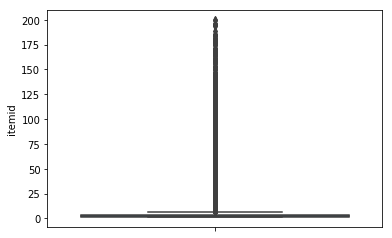

In [25]:
# boxplot of per user unique product interactions
sns.boxplot( y=events.groupby(["visitorid"]).itemid.nunique() )

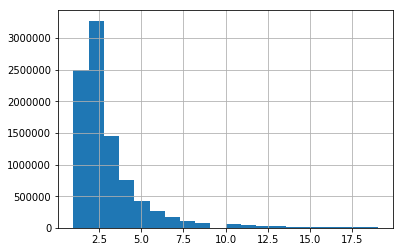

In [26]:
# clipped distribution of per user unique product interactions
events.groupby(["visitorid"]).itemid.nunique()[events.groupby(["visitorid"]).itemid.nunique() <20].hist(bins=20)

### items

In [27]:
# distribution of items by count of interactions
events.itemid.value_counts().describe()

count     52739.000000
mean        625.797683
std        2810.071521
min           1.000000
25%           4.000000
50%          22.000000
75%         205.000000
max      147419.000000
Name: itemid, dtype: float64

At least 25% of products has only 1 interaction

In [28]:
# How many products were interacted by 1,2,..,10 users?
events.groupby(["itemid"]).visitorid.nunique().value_counts()[:50].sort_index()

1     7144
2     4269
3     2881
4     2138
5     1667
6     1341
7     1081
8      907
9      800
10     702
11     628
12     540
13     499
14     427
15     412
16     401
17     345
18     318
19     314
20     300
21     289
22     245
23     250
24     261
25     216
26     230
27     222
28     254
29     209
30     176
31     178
32     170
33     176
34     162
35     149
36     181
37     152
38     147
39     146
40     147
41     131
42     145
43     140
44     115
45     148
46     131
49     119
51     126
54     117
56     114
Name: visitorid, dtype: int64

In [29]:
# How many products were interacted by 1,2,..,50 users?
# Cumulative, percentual
aux = events.groupby(["itemid"]).visitorid.nunique().value_counts().sort_index()
(aux.cumsum() / aux.sum())[:50]

1     0.135460
2     0.216405
3     0.271033
4     0.311572
5     0.343181
6     0.368608
7     0.389105
8     0.406303
9     0.421472
10    0.434783
11    0.446690
12    0.456929
13    0.466391
14    0.474488
15    0.482300
16    0.489903
17    0.496445
18    0.502474
19    0.508428
20    0.514117
21    0.519597
22    0.524242
23    0.528982
24    0.533931
25    0.538027
26    0.542388
27    0.546597
28    0.551414
29    0.555376
30    0.558714
31    0.562089
32    0.565312
33    0.568649
34    0.571721
35    0.574546
36    0.577978
37    0.580860
38    0.583648
39    0.586416
40    0.589203
41    0.591687
42    0.594437
43    0.597091
44    0.599272
45    0.602078
46    0.604562
47    0.606724
48    0.608715
49    0.610971
50    0.613114
Name: visitorid, dtype: float64

In [30]:
# What is the median of unique users interacted per item?
events.groupby(["itemid"]).visitorid.nunique().value_counts().median()

1.0

In [31]:
# What is the maximum of unique users interacted per item?
max(events.groupby(["itemid"]).visitorid.nunique().value_counts())

7144

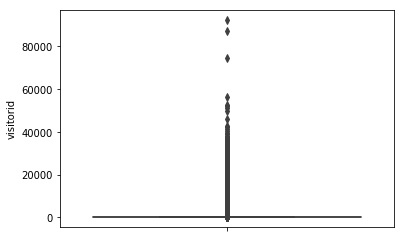

In [32]:
# boxplot of per item unique customer interactions
sns.boxplot( y=events.groupby(["itemid"]).visitorid.nunique() )

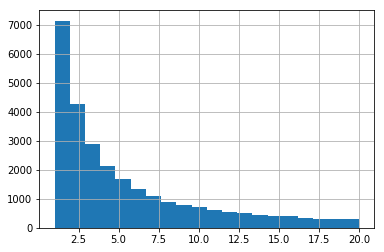

In [33]:
# clipped distribution of per item unique customer interactions
events.groupby(["itemid"]).visitorid.nunique()[events.groupby(["itemid"]).visitorid.nunique() <=20].hist(bins=20)

### Timestamp

In [47]:
events['timestamp'][:5]

0    2014-04-07T10:51:09.277Z
1    2014-04-07T10:54:09.868Z
2    2014-04-07T10:54:46.998Z
3    2014-04-07T10:57:00.306Z
4    2014-04-07T13:56:37.614Z
Name: timestamp, dtype: object

In [51]:
events['datetime'] = pd.to_datetime(events['timestamp'],format="%Y-%m-%dT%H:%M:%S.%fZ")

Data are from range between 2015-05-03 and 2015-09-18

In [52]:
min(events['datetime'])

Timestamp('2014-04-01 03:00:00.124000')

In [53]:
max(events['datetime'])

Timestamp('2014-09-30 02:59:59.430000')

C:\Users\koprl\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


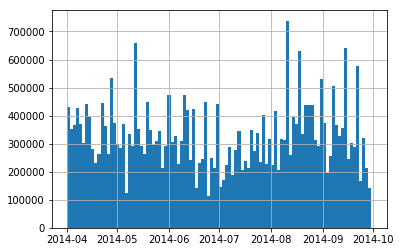

In [54]:
# events in time
events['datetime'].hist(bins=100)

# Data processing

During data processing, we excluded products with less than 20 interactions and users with less than 20 products and more than 50 products

Sizes of raw data

- User count
- Item count
- Evenet count

In [28]:
print(events.itemid.nunique())
print(events.visitorid.nunique())
print(events.shape)

52739
9249729
(33003944, 4)


In [61]:
item_users_inter = events.groupby("itemid")["visitorid"].nunique()
item_users_inter = item_users_inter[item_users_inter >= 20]
new_events = events[events["itemid"].isin(item_users_inter.index)]

user_items_inter = new_events.groupby(["visitorid"])["itemid"].nunique()
user_items_inter = user_items_inter[(user_items_inter >= 20) & (user_items_inter <= 50)]
new_events = new_events[new_events["visitorid"].isin(user_items_inter.index)]

Sizes of data after processing

- User count
- Item count
- Evenet count

In [62]:
print(new_events.itemid.nunique())
print(new_events.visitorid.nunique())
print(new_events.shape)

23091
35996
(1149969, 4)


Average unique items per user

In [63]:
new_events.groupby(["visitorid"]).itemid.nunique().mean()

26.6806589621069

In [64]:
# How many users interacted with 20,21,..,50 unique products?
# Cumulative, percentual
aux = new_events.groupby(["visitorid"]).itemid.nunique().value_counts().sort_index()
(aux.cumsum() / aux.sum())

20    0.140543
21    0.257417
22    0.353956
23    0.434548
24    0.504112
25    0.565924
26    0.618513
27    0.665768
28    0.706773
29    0.742721
30    0.771891
31    0.797700
32    0.821119
33    0.842066
34    0.861373
35    0.878403
36    0.893266
37    0.906490
38    0.918769
39    0.930270
40    0.938660
41    0.947800
42    0.956662
43    0.963774
44    0.970302
45    0.976081
46    0.981248
47    0.986248
48    0.990943
49    0.996000
50    1.000000
Name: itemid, dtype: float64

In [7]:
events = load_clicks()

C:\Users\koprl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [10]:
data_x,data_y = preprocessing(events,"visitorid","itemid",min_items_user=20,max_items_user=50,min_interaction_item=20,verbose=1,sparse=False)

preprocessing_seq: 1000 / 35996
preprocessing_seq: 2000 / 35996
preprocessing_seq: 3000 / 35996
preprocessing_seq: 4000 / 35996
preprocessing_seq: 5000 / 35996
preprocessing_seq: 6000 / 35996
preprocessing_seq: 7000 / 35996
preprocessing_seq: 8000 / 35996
preprocessing_seq: 9000 / 35996
preprocessing_seq: 10000 / 35996
preprocessing_seq: 11000 / 35996
preprocessing_seq: 12000 / 35996
preprocessing_seq: 13000 / 35996
preprocessing_seq: 14000 / 35996
preprocessing_seq: 15000 / 35996
preprocessing_seq: 16000 / 35996
preprocessing_seq: 17000 / 35996
preprocessing_seq: 18000 / 35996
preprocessing_seq: 19000 / 35996
preprocessing_seq: 20000 / 35996
preprocessing_seq: 21000 / 35996
preprocessing_seq: 22000 / 35996
preprocessing_seq: 23000 / 35996
preprocessing_seq: 24000 / 35996
preprocessing_seq: 25000 / 35996
preprocessing_seq: 26000 / 35996
preprocessing_seq: 27000 / 35996
preprocessing_seq: 28000 / 35996
preprocessing_seq: 29000 / 35996
preprocessing_seq: 30000 / 35996
preprocessing_seq: 

In [11]:
save_processed(data_x,data_y)

In [9]:
save_processed_sparse(data_x,data_y)